            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


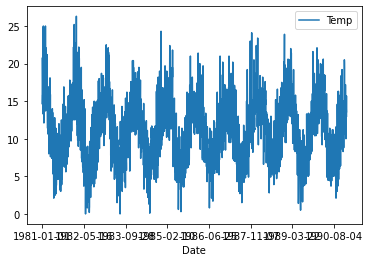

In [7]:
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()

(506, 13)
(506, 13, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 12, 32)            96        
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                24640     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 24,801
Trainable params: 24,801
Non-trainable params: 0
_________________________________________________________________
14/14 [==============================] - 0s 2ms/step - loss: 12.9392
12.939205169677734
MSE: 12.5543


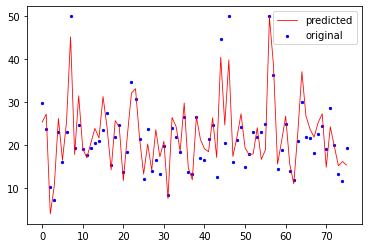

In [9]:
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

boston = load_boston()
x, y = boston.data, boston.target
print(x.shape)

x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(13,1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(xtrain, ytrain, batch_size=12,epochs=200, verbose=0)

ypred = model.predict(xtest)
print(model.evaluate(xtrain, ytrain))
print("MSE: %.4f" % mean_squared_error(ytest, ypred))

x_ax = range(len(ypred))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()